## Fourier transform

In [17]:
using Plots
gr()

Plots.GRBackend()

In [5]:
function transform(k::Integer, X::AbstractArray)
    sum = 0
    N = length(X)
    for (n, x) in enumerate(X)
        sum += x * exp(-1im * 2π * k * (n - 1) / N)
    end
    sum
end

function naivedft(X::AbstractArray)
    transformed = []
    for k = 0:length(X) - 1
        append!(transformed, transform(k, X))
    end
    transformed
end

naivedft (generic function with 2 methods)

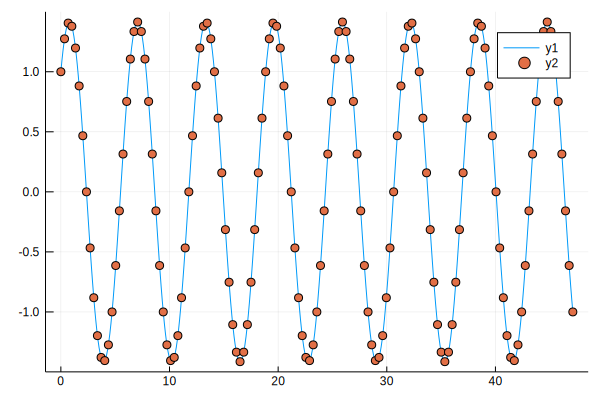

In [63]:
x_range = 15π
x = range(0, stop=x_range, length=floor(Int, x_range * 10))
x_sampled = range(0, stop=x_range, length=floor(Int, x_range * 3))
f(x) = cos.(x) + sin.(x)
y = f(x)
y_sampled = f(x_sampled)
plot(x, y)
plot!(x_sampled, y_sampled, seriestype=:scatter)

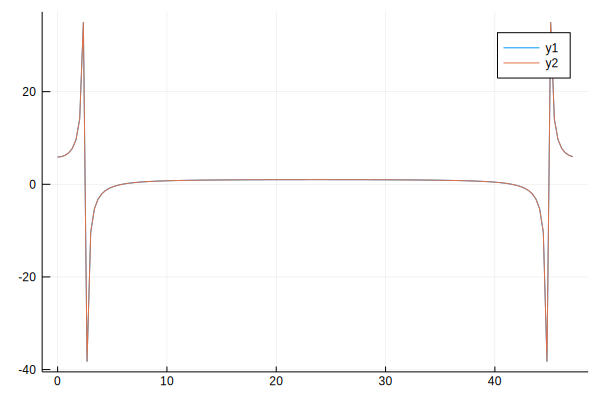

In [66]:
using FFTW
plot(x_sampled, real(fft(y_sampled)))
plot!(x_sampled, real(naivedft(y_sampled)))

### Cooley-Tukey FFT

In [67]:
# TODO